## Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

plt.rcParams['figure.figsize']=(12, 6)


## Data import

In [2]:
train = pd.read_csv('data/space_X_train.csv')
test = pd.read_csv('data/space_X_test.csv')
sample_preds = pd.read_csv('data/ejemplo_predicciones.csv')

## Exploratory Data Analysis - EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2100 non-null   int64  
 1   sensor_1    2100 non-null   float64
 2   sensor_2    2100 non-null   float64
 3   sensor_3    2100 non-null   float64
 4   sensor_4    2100 non-null   float64
 5   sensor_5    2100 non-null   float64
 6   sensor_6    2100 non-null   float64
 7   target      2100 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 131.4 KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  900 non-null    int64  
 1   sensor_1    900 non-null    float64
 2   sensor_2    900 non-null    float64
 3   sensor_3    900 non-null    float64
 4   sensor_4    900 non-null    float64
 5   sensor_5    900 non-null    float64
 6   sensor_6    900 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.3 KB


In [5]:
sample_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   final_status  30 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


In [6]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_1,2100.0,-0.204656,1.543613,-6.683655,-1.171340,-0.443868,0.890023,4.565547
sensor_2,2100.0,0.199249,1.614024,-5.383371,-0.877386,0.320507,1.321430,6.700133
sensor_3,2100.0,-0.378140,1.450548,-6.147055,-1.365990,-0.439745,0.662898,4.157518
sensor_4,2100.0,-0.206425,1.442225,-5.653594,-1.259403,-0.176504,0.866879,4.371912
sensor_5,2100.0,-0.186419,1.501573,-5.912521,-1.211685,-0.195751,0.851843,5.068783
sensor_6,2100.0,-0.433229,1.188791,-4.433189,-1.131944,-0.406754,0.348593,4.016324
target,2100.0,1.980476,1.410537,0.000000,1.000000,2.000000,3.000000,4.000000


In [8]:
target_exp = pd.DataFrame(train.target.value_counts()).reset_index()
target_exp.columns = ['Target', 'Count']
target_exp

,Target,Count
0,0,427
1,3,426
2,1,423
3,2,419
4,4,405


## EDA target column

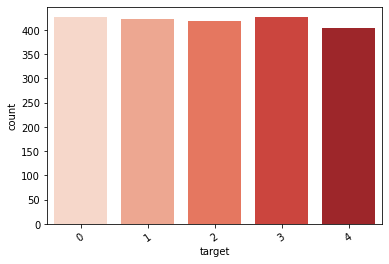

In [9]:
sns.countplot(x=train.target, palette='Reds')

plt.xticks(rotation=35);

#### We can see that the data are balance, so i think is not necessary to apply neither algorithm to balance its.

In [10]:
corr = train.corr()

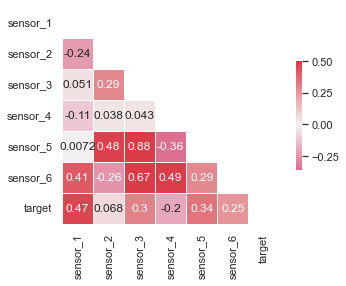

In [11]:
sns.set(style='white')  # estilo blanco

mask=np.triu(np.ones_like(corr, dtype=bool)) # genera una mascara para ocultar la triangular superior

cmap=sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores con degradado


# heatmap o mapa de calor

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

### After evaluate the correlation between columns, we can see that some columns have a relative correlation but we can keep it, because it didn't have relevance

## Models training

### For this case i choose three models for training, RandomForest Classifier, XGBoost Classifier, and XGBoostRF Classifier

In [14]:
lr = LogisticRegressionCV()
rf = RandomForestClassifier()
xgbc = XGBClassifier()
xgbrfc = XGBRFClassifier()

models = [lr, rf, xgbc, xgbrfc]

In [15]:
X = train.drop('target', axis=1)
y = train.target
X.shape, y.shape

((2100, 6), (2100,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=0.2)

Initialize training of LogisticRegress ........

Model trained :)

-----------Resultados para el modelo LogisticRegress-----------

f_1 score: 0.49730464681524966
--------------------------------------------------------

-----------Confusion Matrix of LogisticRegress ---------------------------



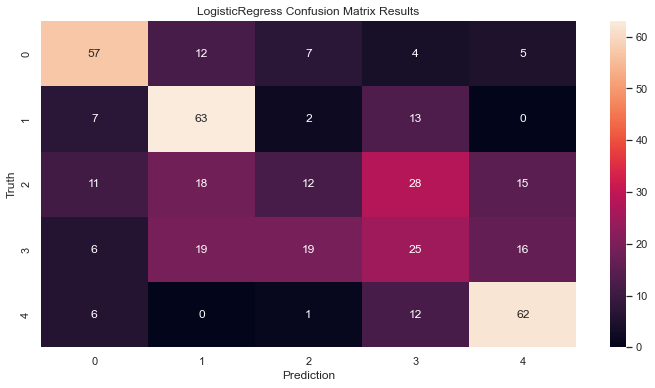

--------------------------------------------------------

Initialize training of RandomForestCla ........

Model trained :)

-----------Resultados para el modelo RandomForestCla-----------

f_1 score: 0.779290657508502
--------------------------------------------------------

-----------Confusion Matrix of RandomForestCla ---------------------------



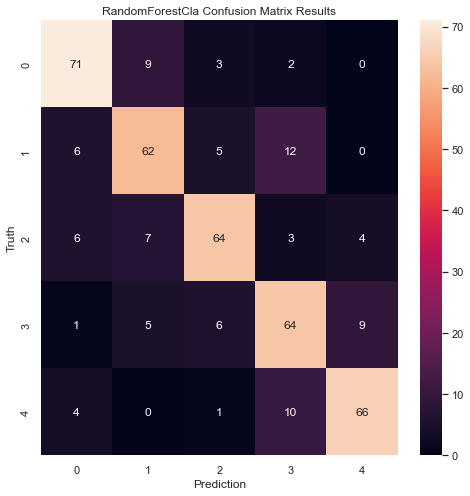

--------------------------------------------------------

Initialize training of XGBClassifier(b ........

Model trained :)

-----------Resultados para el modelo XGBClassifier(b-----------

f_1 score: 0.7928974812464343
--------------------------------------------------------

-----------Confusion Matrix of XGBClassifier(b ---------------------------



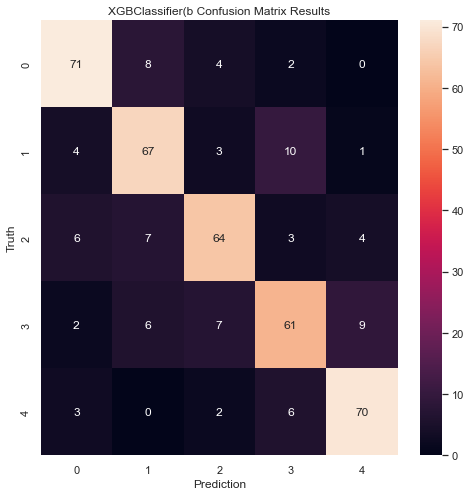

--------------------------------------------------------

Initialize training of XGBRFClassifier ........

Model trained :)

-----------Resultados para el modelo XGBRFClassifier-----------

f_1 score: 0.7689491674082034
--------------------------------------------------------

-----------Confusion Matrix of XGBRFClassifier ---------------------------



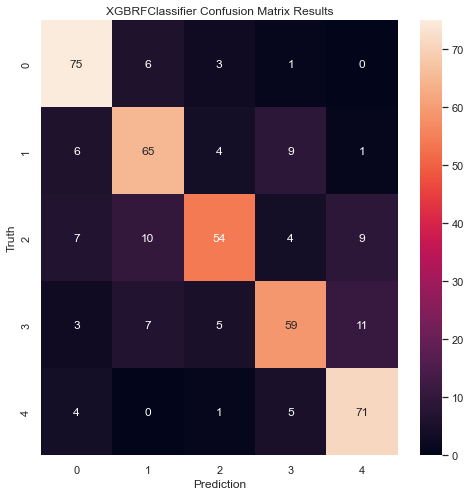

--------------------------------------------------------



In [17]:
for model in models:
    name = str(model)[:15]
    
    print(f'Initialize training of {name} ........\n')
    
    model.fit(X_train, y_train)
    
    print('Model trained :)\n')
    
    model_pred = model.predict(X_test)
    f1_model = f1_score(y_test, model_pred, average='macro')
    cm_model = confusion_matrix(y_test, model_pred)
    
    print(f'-----------Resultados para el modelo {name}-----------\n')

    print(f'f_1 score: {f1_model}')
    
    print('--------------------------------------------------------\n')
    
    print(f'-----------Confusion Matrix of {name} ---------------------------\n')
    sns.heatmap(cm_model, annot=True)
    sns.set(rc={'figure.figsize':(8,8)})
    plt.title(f'{name} Confusion Matrix Results')
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.show();
    
    print('--------------------------------------------------------\n')
    
    

### Gridsearch 

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(10, 200, 10)]

min_samples_split = [int(x) for x in np.linspace(2, 10, 1)]

min_samples_leaf = [int(x) for x in np.linspace(1, 10, 1)]

max_features = ['auto', 'sqrt', 'log2']

bootstrap = [True, False]

warm_start = [True, False]

In [58]:
random_grid={'n_estimators': n_estimators,
             'criterion': criterion,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'max_features': max_features,
             'bootstrap': bootstrap,
             'warm_start': warm_start,
             }

In [60]:
rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=5,
                             verbose=10,
                             n_jobs=-1,
                             scoring='f1_macro')

In [61]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'warm_start': [True, False]},
                   scoring='f1_macro', verbose=10)

In [62]:
rf_random.best_params_

{'warm_start': True,
 'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 157,
 'criterion': 'entropy',
 'bootstrap': True}

In [63]:
rf_random.best_score_

0.7694217191390473

In [65]:
pred = rf_random.predict(X_test)

In [67]:

f1_rf_random = f1_score(y_test, pred, average='macro')
cm_rf_random = confusion_matrix(y_test, pred)

print(f'-----------Resultados para el modelo completo rf_random-----------')
print(f'f_1 score: {f1_rf_random}')
print('--------------------------------------------------------')

-----------Resultados para el modelo completo rf_random-----------
f_1 score: 0.7745395972185758
--------------------------------------------------------


### Scale the data looking for better perfomance on models

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

Initialize training of LogisticRegress ........



C:\Users\botic\anaconda3\envs\nlp_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\botic\anaconda3\envs\nlp_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Model trained :)

-----------Resultados para el modelo LogisticRegress-----------

f_1 score: 0.4944860243397546
--------------------------------------------------------

-----------Confusion Matrix of LogisticRegress ---------------------------



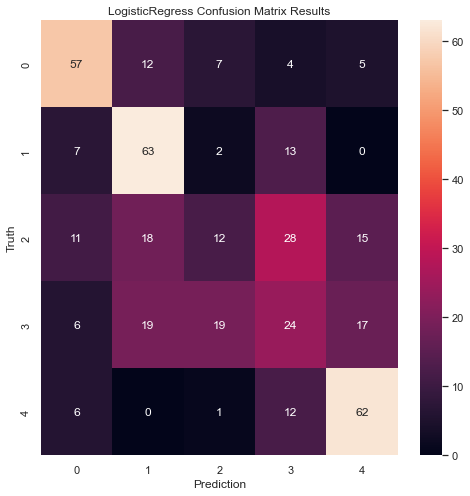

--------------------------------------------------------

Initialize training of RandomForestCla ........

Model trained :)

-----------Resultados para el modelo RandomForestCla-----------

f_1 score: 0.7929841417966792
--------------------------------------------------------

-----------Confusion Matrix of RandomForestCla ---------------------------



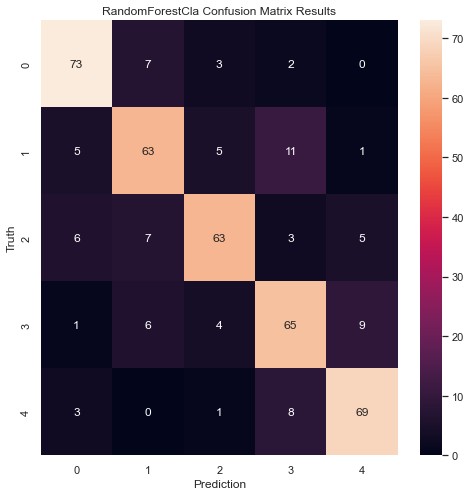

--------------------------------------------------------

Initialize training of XGBClassifier(b ........

Model trained :)

-----------Resultados para el modelo XGBClassifier(b-----------

f_1 score: 0.7926885743591765
--------------------------------------------------------

-----------Confusion Matrix of XGBClassifier(b ---------------------------



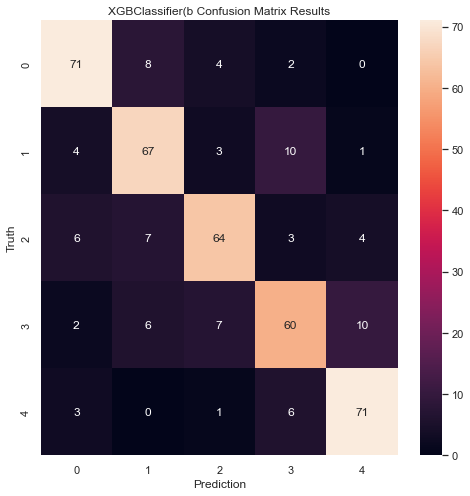

--------------------------------------------------------

Initialize training of XGBRFClassifier ........

Model trained :)

-----------Resultados para el modelo XGBRFClassifier-----------

f_1 score: 0.7689491674082034
--------------------------------------------------------

-----------Confusion Matrix of XGBRFClassifier ---------------------------



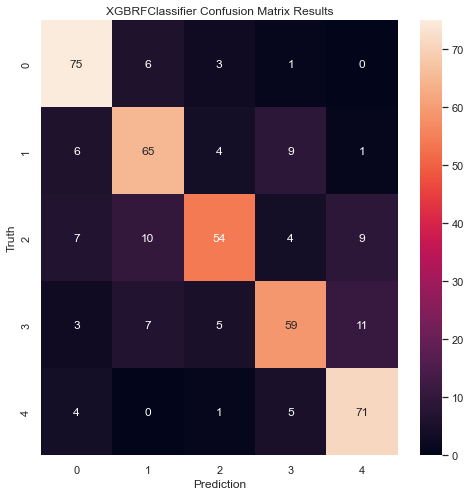

--------------------------------------------------------



In [19]:
for model in models:
    name = str(model)[:15]
    
    print(f'Initialize training of {name} ........\n')
    
    model.fit(X_train_scal, y_train)
    
    print('Model trained :)\n')
    
    model_pred = model.predict(X_test_scal)
    f1_model = f1_score(y_test, model_pred, average='macro')
    cm_model = confusion_matrix(y_test, model_pred)
    
    print(f'-----------Resultados para el modelo {name}-----------\n')

    print(f'f_1 score: {f1_model}')
    
    print('--------------------------------------------------------\n')
    
    print(f'-----------Confusion Matrix of {name} ---------------------------\n')
    sns.heatmap(cm_model, annot=True)
    sns.set(rc={'figure.figsize':(8,8)})
    plt.title(f'{name} Confusion Matrix Results')
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.show();
    
    print('--------------------------------------------------------\n')

In [79]:
rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=5,
                             verbose=10,
                             n_jobs=-1,
                             scoring='f1_macro')

In [80]:
rf_random.fit(X_train_scal, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'warm_start': [True, False]},
                   scoring='f1_macro', verbose=10)

In [81]:
rf_random.best_params_

{'warm_start': True,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 73,
 'criterion': 'gini',
 'bootstrap': False}

In [82]:
rf_random.best_score_

0.7728963001577618

In [83]:
pred = rf_random.predict(X_test_scal)

In [84]:
f1_rf_random = f1_score(y_test, pred, average='macro')
cm_rf_random = confusion_matrix(y_test, pred)

print(f'-----------Resultados para el modelo completo rf_random-----------')
print(f'f_1 score: {f1_rf_random}')
print('--------------------------------------------------------')

-----------Resultados para el modelo completo rf_random-----------
f_1 score: 0.7787378422150617
--------------------------------------------------------


### Final results

In [24]:
pred = rf.predict(X_test_scal)
f1_score(y_test, pred, average='macro')

0.7929841417966792

In [20]:
xgbc_pred = xgbc.predict(X_test_scal)
f1_score(y_test, xgbc_pred, average='macro')

0.7926885743591765

In [22]:
xgbrfc_pred = xgbrfc.predict(X_test_scal)
f1_score(y_test, xgbrfc_pred, average='macro')

0.7689491674082034

In [25]:
results = pd.DataFrame(pred, columns=['final_status'])

In [26]:
results

,final_status
0,2
1,1
2,1
3,2
4,1
...,...
415,1
416,4
417,4
418,0


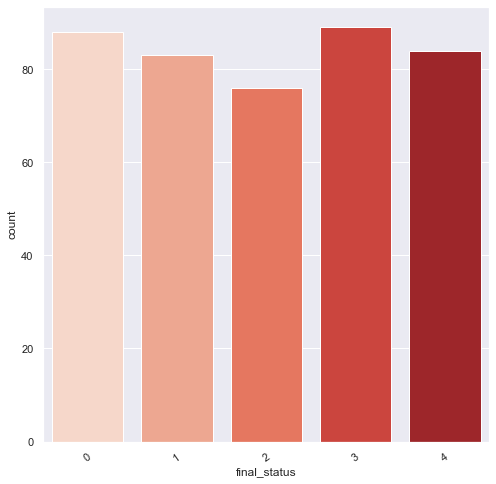

In [28]:
sns.countplot(x=results.final_status, palette='Reds')

plt.xticks(rotation=35);

In [30]:
results.to_csv('predictions.csv', index=False)